In [61]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def new_del(list_, num):
    _new_list = list_
    _remove_list = np.array(num)
    for _i in _remove_list:
        del _new_list[_i]
        _remove_list -= 1
    return _new_list

def chunk(list_, size):
    return [list_[i:i + size] for i in range(0, len(list_), size)]

class RNE:
    def __init__(self, rne_file_name):
        self.data = []
        with open(rne_file_name) as file:
            data = csv.reader(file)
            next(data)
            for row in data:
                self.data.append(row)
    
    def remove_data(self):
        self.remove_list = []
        i = 0
        while i < len(self.data):
            if int(self.data[i][0]) < 7:
                self.remove_list.append(i)
            i += 1
        return self.remove_list
    
    def time(self):
        self.time_list = []
        for row in self.data:
            self.time_list.append(int(row[0])-7)
        return new_del(self.time_list, self.remove_data())
            
    def value(self, size):
        self.value_list = []
        for row in self.data:
            self.value_list.append(int(row[2]))
        return chunk(new_del(self.value_list, self.remove_data()), size)
    
    def integral(self, start, finish, sampling_rate, size):
        self.integral_list = []
        for row in self.value(size):
            result = 0
            for i in range(start, finish-1):
                result += (row[i] + row[i+1])
            self.integral_list.append(result * sampling_rate)
        return self.integral_list
    
    def peak_range(self, threshold, size):
        pole_list = []
        for row in self.value(size):
            min_value = []
            pole_n = []
            for i in range(len(row)):
                if row[i] <= threshold and (row[i] - row[i-1]) * (row[i+1] - row[i]) <= 0:
                    min_value.append(i)
            for i in min_value:
                pole_one = []
                pole = i - 1
                while (row[pole-1] - row[pole]) * (row[pole] - row[pole+1]) > 0 and pole > 0:
                    pole -= 1
                pole_one.append(pole)
                pole = i + 1
                while (row[pole-1] - row[pole]) * (row[pole] - row[pole+1]) > 0 and pole < len(row)-1:
                    pole += 1
                pole_one.append(pole)
                pole_n.append(pole_one)
            pole_list.append(pole_n)
        return pole_list
    
    def drow_graph(self, size):
        for i in range(len(self.value(size))):
            plt.plot(self.value(size)[i])
            plt.show()

[183723, 183378, 183236, 183498, 183385, 183682, 183010, 183424, 183560, 183364, 183423, 183410, 183542, 183101, 183595, 183556, 183455, 183212, 182998, 183776, 183486, 183529, 183761, 183488, 183521, 183725, 183533, 183332, 183162, 183296, 183616, 183478, 183502, 183448, 183586, 183436, 183099, 183460, 183530, 183654, 183054, 183466, 183637, 183592, 183449, 183320, 183342, 183262, 183442, 183447, 183562, 183461, 183478, 183401, 183530, 183709, 183399, 182502, 183546, 183412, 183662, 183411, 183272, 183570, 183423, 183841, 183607, 183711, 183663, 183497, 183484, 183486, 183509, 183596, 183458, 183477, 183408, 183387, 183636, 183411, 183556, 183591, 183520, 183601, 183552, 183464, 183530, 183392, 183348]
[[[6, 10]], [[4, 9]], [[2, 10]], [[5, 7]], [[4, 7]], [[4, 7]], [[4, 11]], [[3, 9]], [[4, 7]], [[3, 7]], [[0, 8]], [[2, 10]], [[5, 10]], [[4, 8]], [[1, 13]], [[1, 7]], [[4, 6]], [[5, 8]], [[5, 8]], [[1, 7]], [[4, 7], [37, 45]], [[7, 10]], [[1, 10]], [[2, 7]], [[4, 7]], [[0, 7]], [[4, 7]]

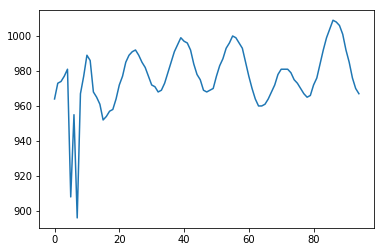

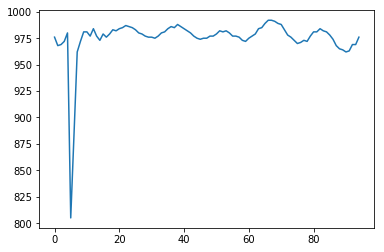

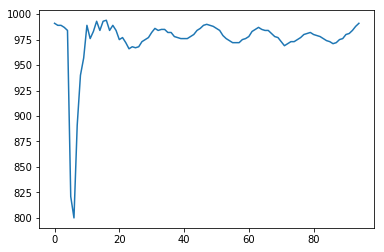

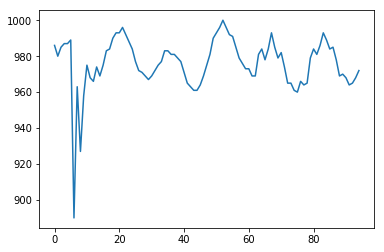

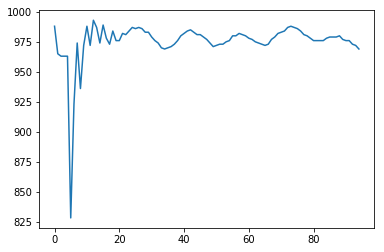

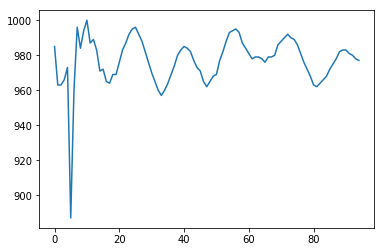

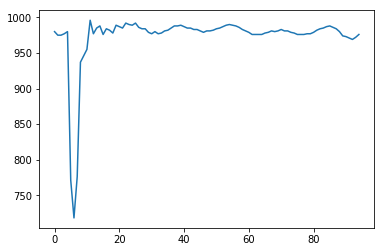

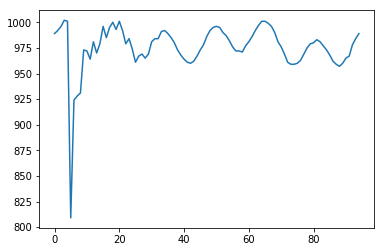

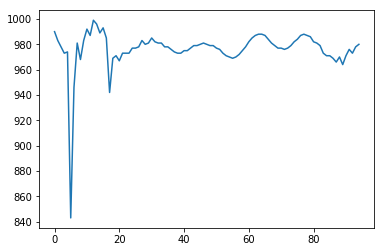

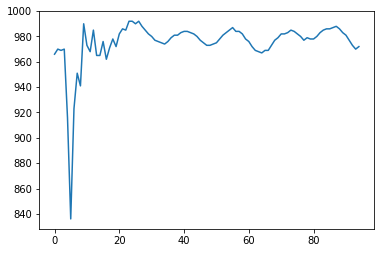

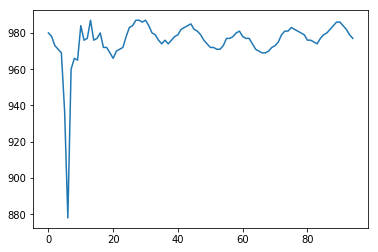

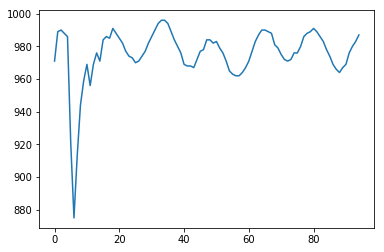

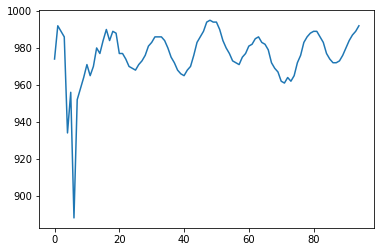

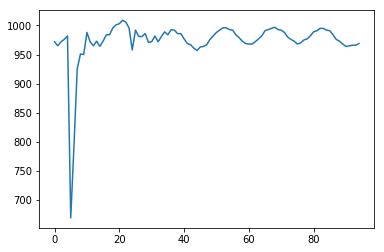

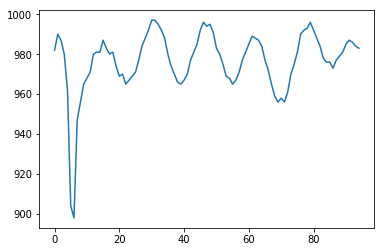

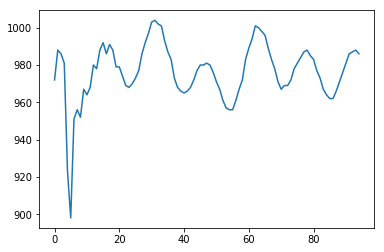

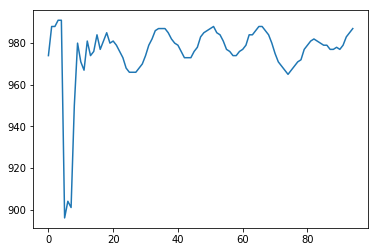

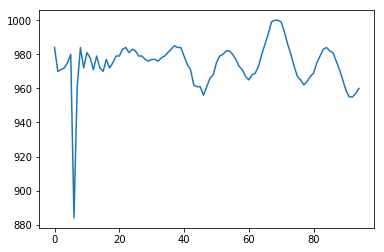

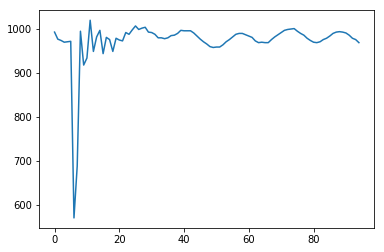

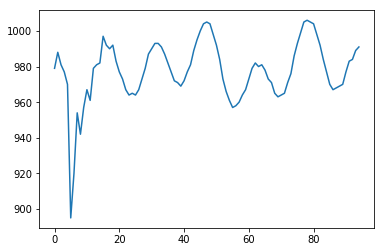

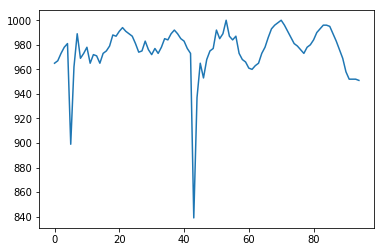

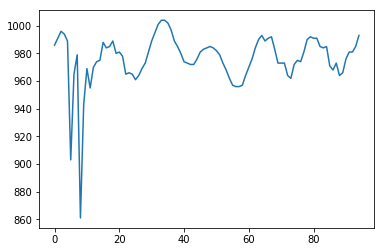

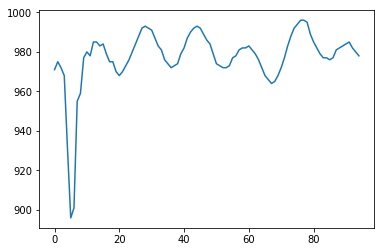

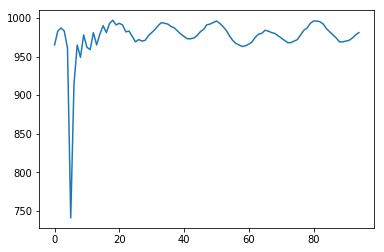

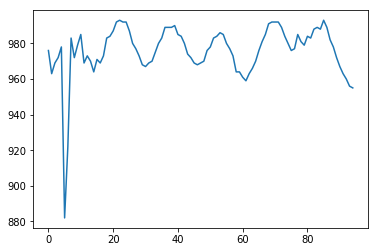

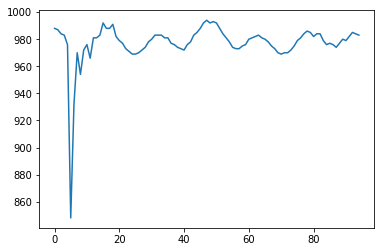

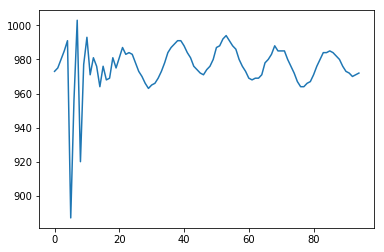

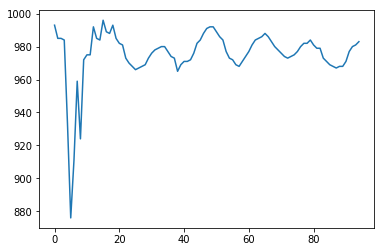

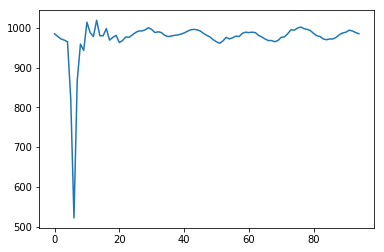

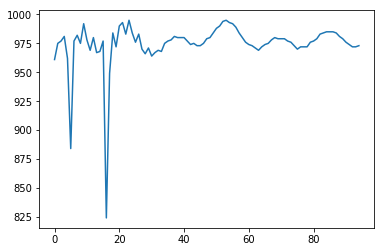

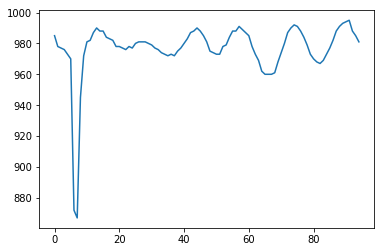

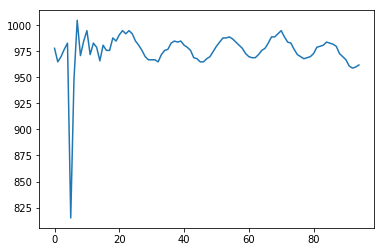

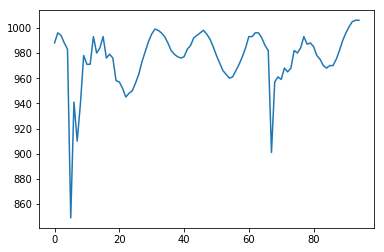

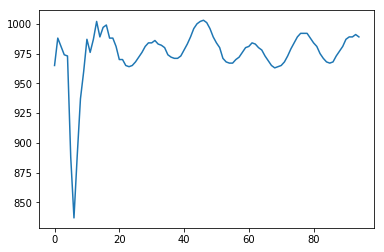

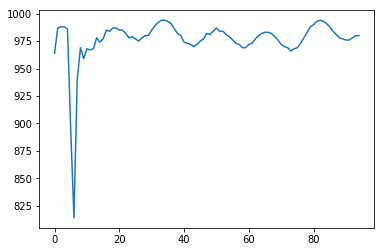

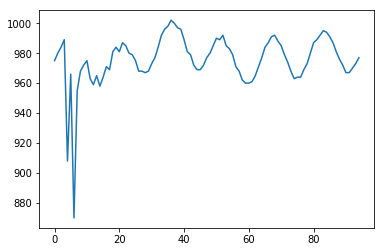

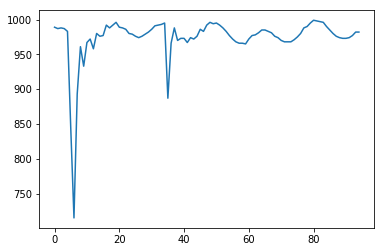

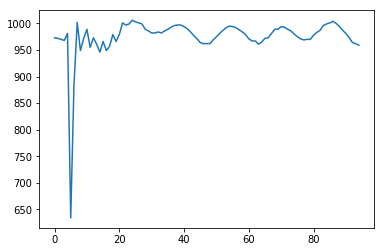

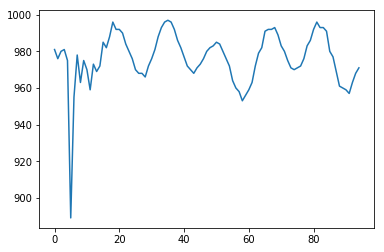

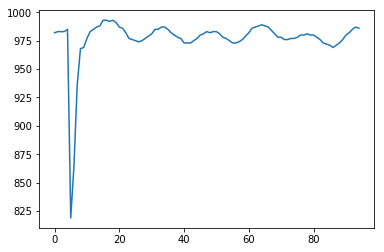

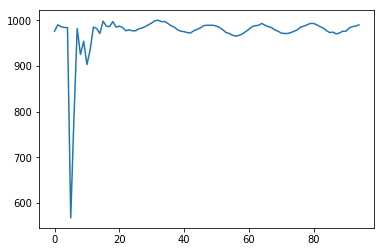

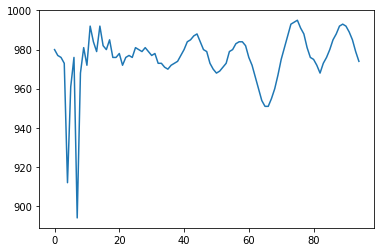

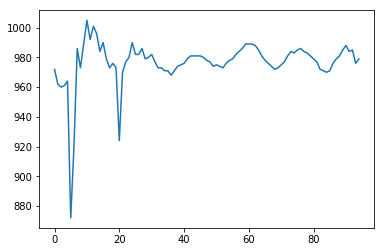

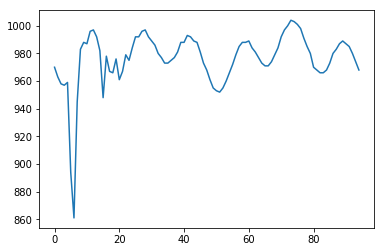

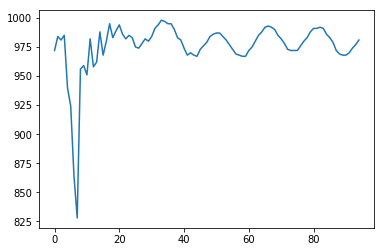

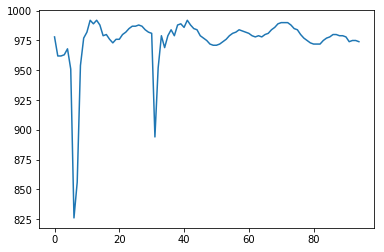

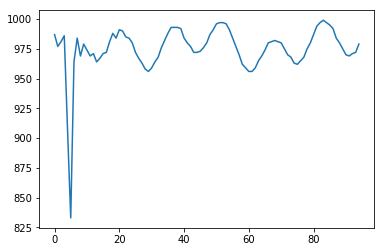

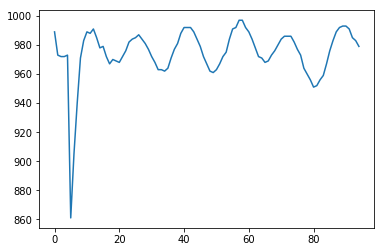

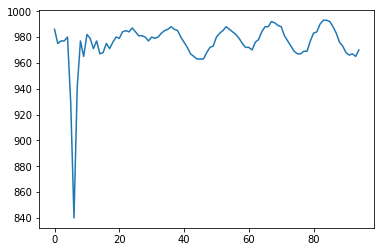

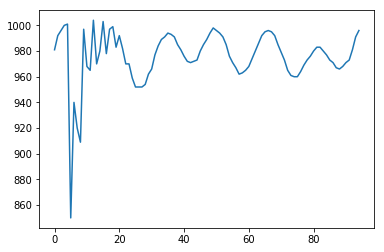

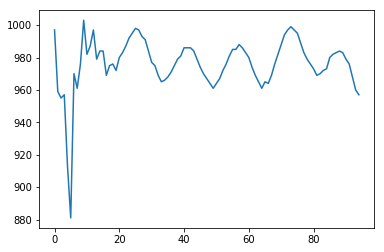

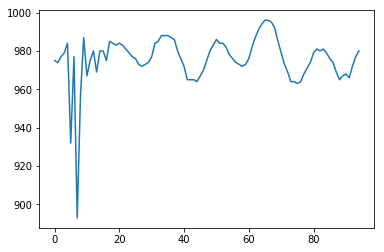

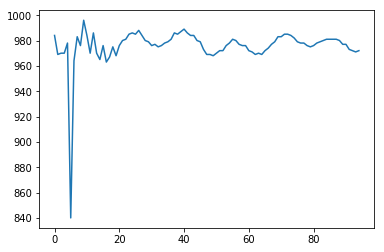

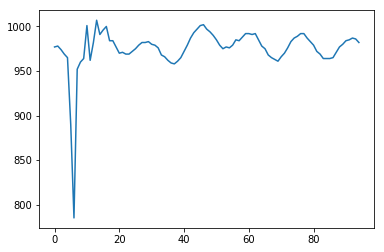

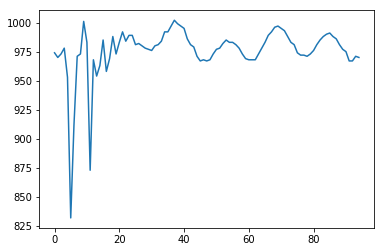

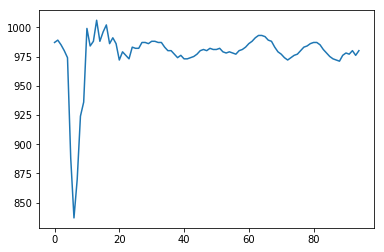

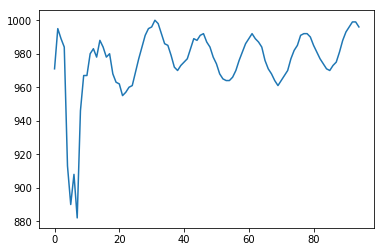

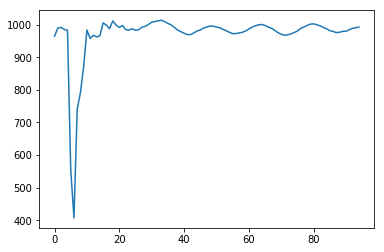

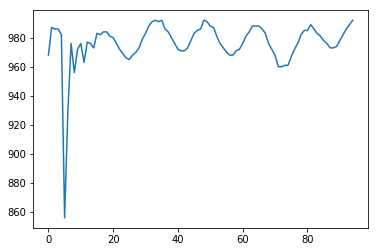

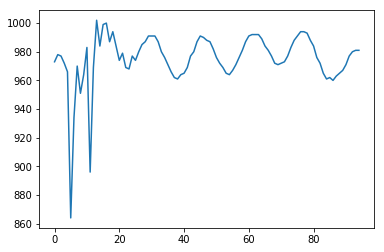

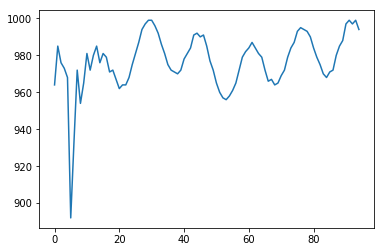

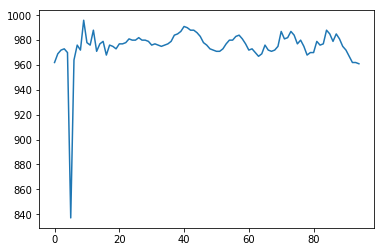

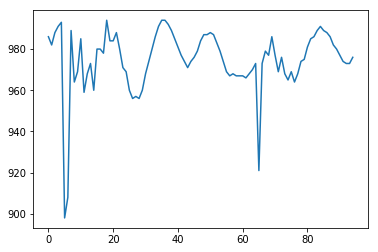

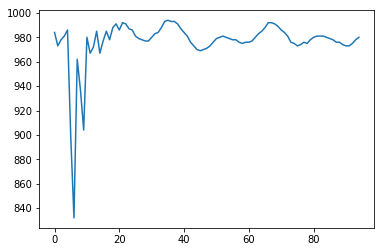

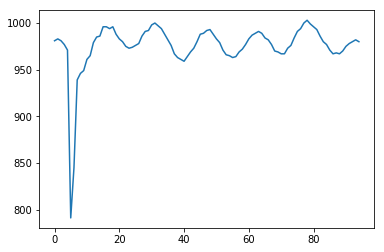

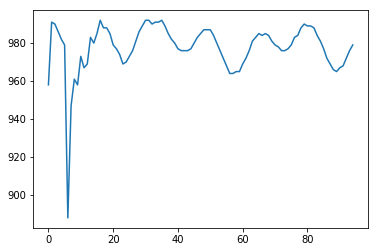

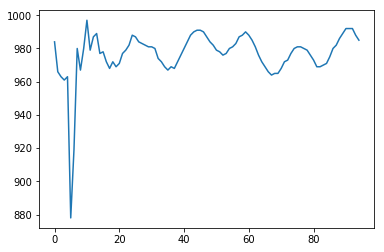

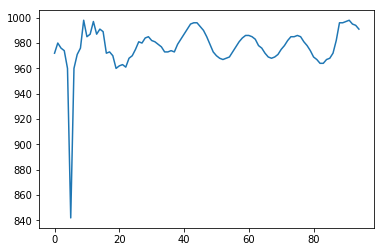

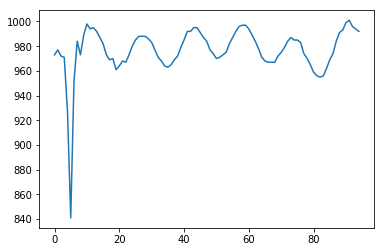

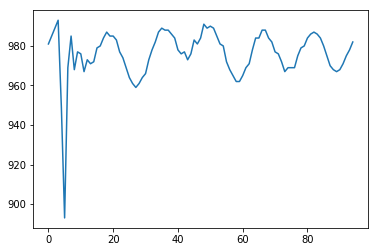

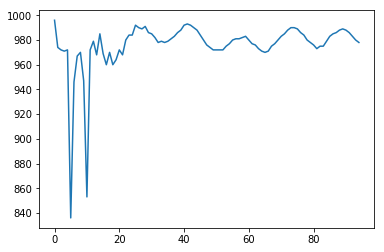

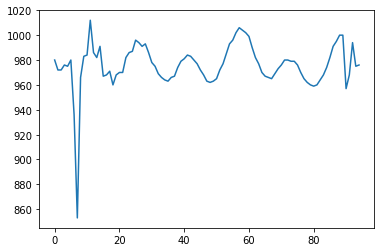

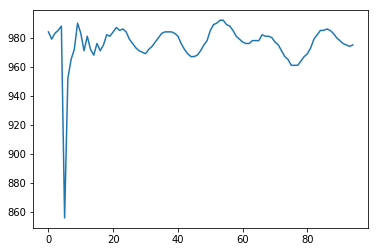

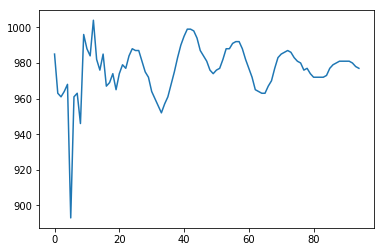

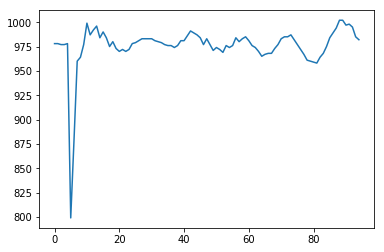

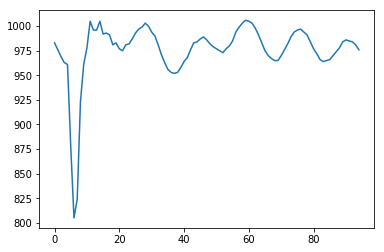

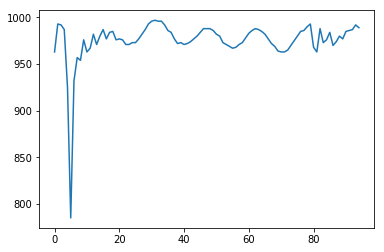

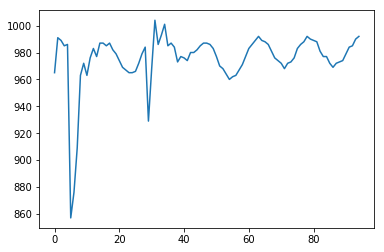

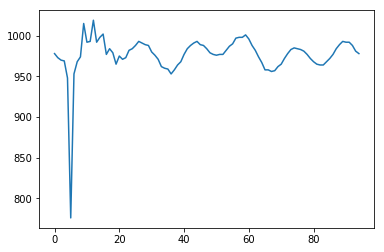

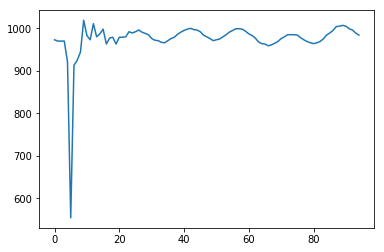

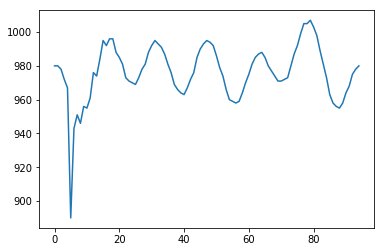

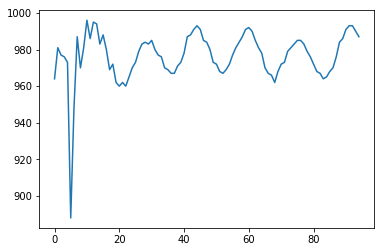

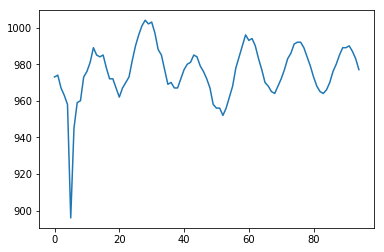

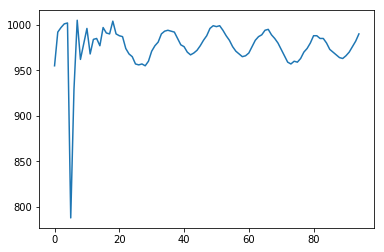

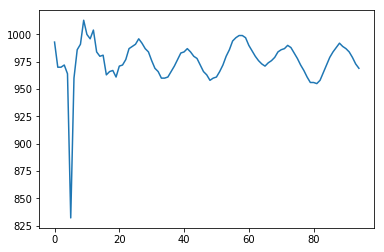

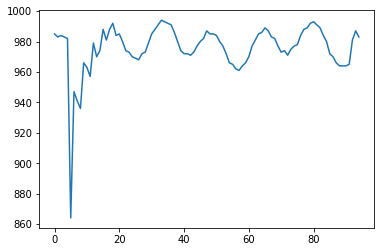

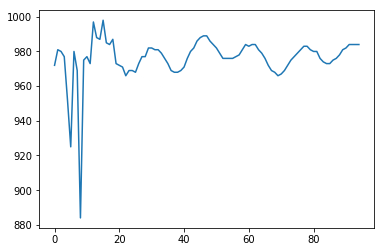

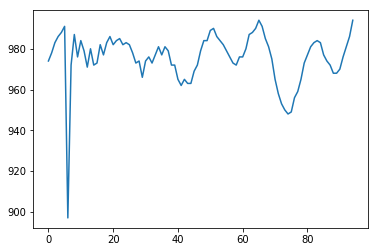

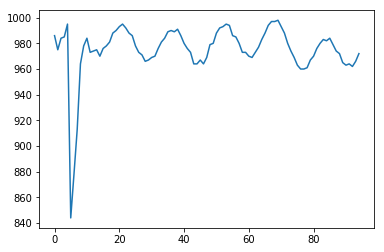

In [64]:
exp1 = RNE('h02-20170526161742.csv')
print(exp1.integral(0, 95, 1, 95))
print(exp1.peak_range(900, 95))
    
exp1.drow_graph(95)